In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#ignore warning
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

# Load and preprocess data

In [87]:
def load_and_preprocess_data(file_path):

    df = pd.read_excel(file_path)
    # Convert 'InvoiceNo' to string to avoid issues with mixed types
    df['InvoiceNo'] = df['InvoiceNo'].astype(str)

    return df

Dictionary
- InvoiceNo: Mã hóa đơn. Mỗi số hóa đơn đại diện cho một giao dịch, có thể chứa nhiều dòng sản phẩm.

- StockCode: Mã sản phẩm. Dùng để định danh từng sản phẩm trong hệ thống.

- Description: Mô tả sản phẩm (tên sản phẩm bằng văn bản).

- Quantity: Số lượng sản phẩm được mua trong dòng giao dịch đó. Giá trị âm thường thể hiện việc trả hàng (returns).

- InvoiceDate: Ngày và giờ phát sinh hóa đơn (thời điểm giao dịch).

- UnitPrice: Đơn giá của từng sản phẩm (theo 1 đơn vị sản phẩm).

- CustomerID: Mã khách hàng duy nhất. Nếu bị thiếu thì đó là giao dịch không xác định được khách hàng.

- Country: Quốc gia của khách hàng.

In [88]:
df = load_and_preprocess_data('Online Retail.xlsx')

In [89]:
df.head(6)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom

In [90]:
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

In [91]:
df.info()
#description và customerid có Nan cần xử lí

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [92]:
#locate where customerid is null
df[df['CustomerID'].isnull()]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445   2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446   2010-12-01 14:32:00       1.66         NaN  United Kingdom  
...                    ...        ...         ...             ...  
541536 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541537 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541538 2011-12-09 10:26:00       4.96         NaN  United Kingdom  
541539 2011-12-09 10:26:00      10.79         NaN  United Kingdom  
541540 2011-12-09 10:26:00    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

In [93]:
#locate where description is nan
df[df['Description'].isnull()]
#nếu description là nan thì chúng ta không biết khách hàng mua gì khi UnitPrice = 0
#dropnan description

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622       536414     22139         NaN        56 2010-12-01 11:52:00   
1970      536545     21134         NaN         1 2010-12-01 14:32:00   
1971      536546     22145         NaN         1 2010-12-01 14:33:00   
1972      536547     37509         NaN         1 2010-12-01 14:33:00   
1987      536549    85226A         NaN         1 2010-12-01 14:34:00   
...          ...       ...         ...       ...                 ...   
535322    581199     84581         NaN        -2 2011-12-07 18:26:00   
535326    581203     23406         NaN        15 2011-12-07 18:31:00   
535332    581209     21620         NaN         6 2011-12-07 18:35:00   
536981    581234     72817         NaN        27 2011-12-08 10:33:00   
538554    581408     85175         NaN        20 2011-12-08 14:06:00   

        UnitPrice  CustomerID         Country  
622           0.0         NaN  United Kingdom  
1970          0.0         NaN  United Kingdom  
1971          0.0         NaN  United Kingdom  
1972          0.0         NaN  United Kingdom  
1987          0.0         NaN  United Kingdom  
...           ...         ...             ...  
535322        0.0         NaN  United Kingdom  
535326        0.0         NaN  United Kingdom  
535332        0.0         NaN  United Kingdom  
536981        0.0         NaN  United Kingdom  
538554        0.0         NaN  United Kingdom  

[1454 rows x 8 columns]

In [94]:
for col in df['Description'].unique():
    print(col)
#nhiều mục sai (mixed up, lost, missing, ???? need, gift, test, sample, damaged, error)
# Cùng tìm hiểu nó là gì nào

WHITE HANGING HEART T-LIGHT HOLDER
WHITE METAL LANTERN
CREAM CUPID HEARTS COAT HANGER
KNITTED UNION FLAG HOT WATER BOTTLE
RED WOOLLY HOTTIE WHITE HEART.
SET 7 BABUSHKA NESTING BOXES
GLASS STAR FROSTED T-LIGHT HOLDER
HAND WARMER UNION JACK
HAND WARMER RED POLKA DOT
ASSORTED COLOUR BIRD ORNAMENT
POPPY'S PLAYHOUSE BEDROOM 
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY 
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS 
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD
LOVE BUILDING BLOCK WORD
RECIPE BOX WITH METAL HEART
DOORMAT NEW ENGLAND
JAM MAKING SET WITH JARS
RED COAT RACK PARIS FASHION
YELLOW COAT RACK PARIS FASHION
BLUE COAT RACK PARIS FASHION
BATH BUILDING BLOCK WORD
ALARM CLOCK BAKELIKE PINK
ALARM CLOCK BAKELIKE RED 
ALARM CLOCK BAKELIKE GREEN
PANDA AND BUNNIES STICKER SHEET
STARS GIFT TAPE 
INFLATABLE POLITICAL GLOBE 
VINTAGE HEADS AND TAILS CARD GAME 
SET/2 RED RETROSPOT TEA TOWELS 
ROUND SNACK BOXES SET OF4 WOODLAND 
SPA

In [95]:
df = df.dropna(subset=['Description'])

In [96]:

#find not normal 6 digits invoice
df[df['InvoiceNo'].str.match('^\d{6}$') == False]
#ALl non-6 digits invoice have C before their No
# Chúng ta thấy các customer này thường có quantity là âm, hãy kiểm tra nó xem
 #C must be Cancel customer

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[9291 rows x 8 columns]

In [97]:
Damage_customers = df[df['InvoiceNo'].str.match('^\d{6}$') == True & (df['Quantity'] < 0)]
# Damage_customers['Description'].unique().tolist()
# Description đều báo lỗi chứng tỏ các các khách hàng này là Damages/Stock Corrections

In [98]:
Cancel_customers = df[df['InvoiceNo'].str.match('^\d{6}$') == False & (df['Quantity'] < 0)]
# Cancel_customers
#Description bình thường chứng tỏ đây là nhóm rời bỏ Churn
#Sau khi phân cụm xong nhóm này sẽ là Cancel

In [99]:
df[df['UnitPrice'] < 0]
#Unit price < 0 is simply wrong value we will drop it
# A này có thể là khách hàng bị đuổi vì nợ xấu
# 2 dòng này sẽ bị loại khỏi bài đến cuối cùng luôn

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [100]:
df.dropna(subset=['CustomerID'], inplace=True)

In [101]:
#lấy df khi quantity và unitprce >0
data = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [102]:
for col in data['Description'].unique():
    print(col)
#các mục sai đã hết sau khi drop quantity < 0

WHITE HANGING HEART T-LIGHT HOLDER
WHITE METAL LANTERN
CREAM CUPID HEARTS COAT HANGER
KNITTED UNION FLAG HOT WATER BOTTLE
RED WOOLLY HOTTIE WHITE HEART.
SET 7 BABUSHKA NESTING BOXES
GLASS STAR FROSTED T-LIGHT HOLDER
HAND WARMER UNION JACK
HAND WARMER RED POLKA DOT
ASSORTED COLOUR BIRD ORNAMENT
POPPY'S PLAYHOUSE BEDROOM 
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY 
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS 
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD
LOVE BUILDING BLOCK WORD
RECIPE BOX WITH METAL HEART
DOORMAT NEW ENGLAND
JAM MAKING SET WITH JARS
RED COAT RACK PARIS FASHION
YELLOW COAT RACK PARIS FASHION
BLUE COAT RACK PARIS FASHION
BATH BUILDING BLOCK WORD
ALARM CLOCK BAKELIKE PINK
ALARM CLOCK BAKELIKE RED 
ALARM CLOCK BAKELIKE GREEN
PANDA AND BUNNIES STICKER SHEET
STARS GIFT TAPE 
INFLATABLE POLITICAL GLOBE 
VINTAGE HEADS AND TAILS CARD GAME 
SET/2 RED RETROSPOT TEA TOWELS 
ROUND SNACK BOXES SET OF4 WOODLAND 
SPA

In [103]:
# Số cột mà sau khi grouby sẽ có
data['CustomerID'].nunique()

4338

# Feature Engineering RFM (Khôi)

## 1. Recency, Frequency and Monetary

In [104]:
def calculate_total_price(data):
    data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
    return data
data = calculate_total_price(data)
data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34

In [253]:
import datetime as dt
def create_rfm_features(df):
    snapshot_date = data['InvoiceDate'].max() + dt.timedelta(days=1)

    # RFM
    rfm = data.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,           # Recency
        'InvoiceNo': 'nunique',         # Frequency
        'TotalPrice': 'sum'             # Monetary
    }).reset_index()

    rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
    return rfm

rfm = create_rfm_features(data)
rfm.head()


CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40

In [254]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4338 non-null   float64
 1   Recency     4338 non-null   int64  
 2   Frequency   4338 non-null   int64  
 3   Monetary    4338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


## 2. Xử lí Outliers

In [255]:
rfm.describe()

CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2054.266460
std     1721.808492   100.014169     7.697998    8989.230441
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     307.415000
50%    15299.500000    51.000000     2.000000     674.485000
75%    16778.750000   142.000000     5.000000    1661.740000
max    18287.000000   374.000000   209.000000  280206.020000

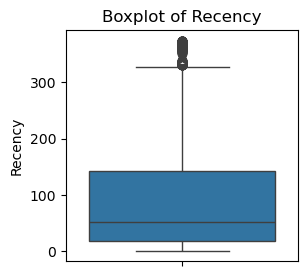

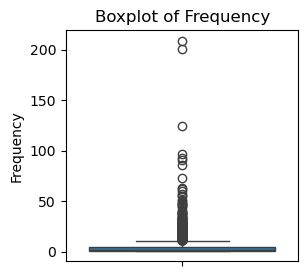

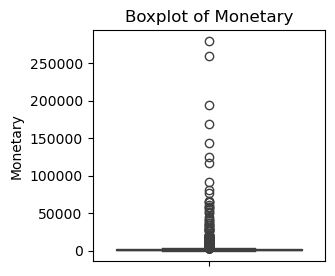

In [256]:
# Plotting boxplots for R, F, M
def plot_boxplot(column, data):
    plt.figure(figsize=(3, 3))
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    #plt.ylim(lower_bound - 10, upper_bound + 10)
    plt.show()

for col in ['Recency', 'Frequency', 'Monetary']:
    plot_boxplot(col, rfm)

# R không nhiều outlier
# F, M có nhiều outlier cần bỏ đi để tiến hành phân cụm
# -3 : Nhóm có outlier F nhưng ko có M
# -2: Nhóm có outlier M nhưng ko có F
# -1: Nhóm có cả 2 outlier


In [257]:
#function for only outliers
def outlier_dataframe(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

#function for only non outliers
def non_outlier_dataframe(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

f_outliers = outlier_dataframe(rfm, 'Frequency')
m_outliers = outlier_dataframe(rfm, 'Monetary')

f_non_outliers = non_outlier_dataframe(rfm['Frequency'])
m_non_outliers = non_outlier_dataframe(rfm['Monetary'])

In [258]:
#put a non_outliers_df of what index is in f_non_outliers and m_non_outliers
non_outliers_df = rfm[rfm['Frequency'].isin(f_non_outliers) & rfm['Monetary'].isin(m_non_outliers)]
non_outliers_data = non_outliers_df.copy()

In [259]:
non_outliers_df.drop(columns=[ 'CustomerID'], inplace=True)

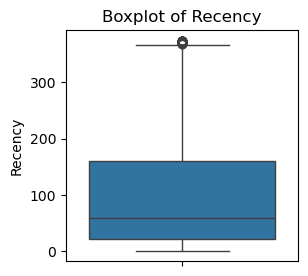

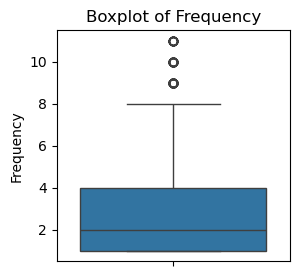

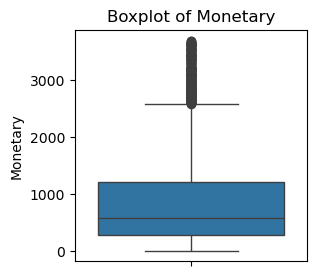

In [260]:
for col in ['Recency', 'Frequency', 'Monetary']:
    plot_boxplot(col, non_outliers_df)
#các box mới đã đỡ xẹp hơn

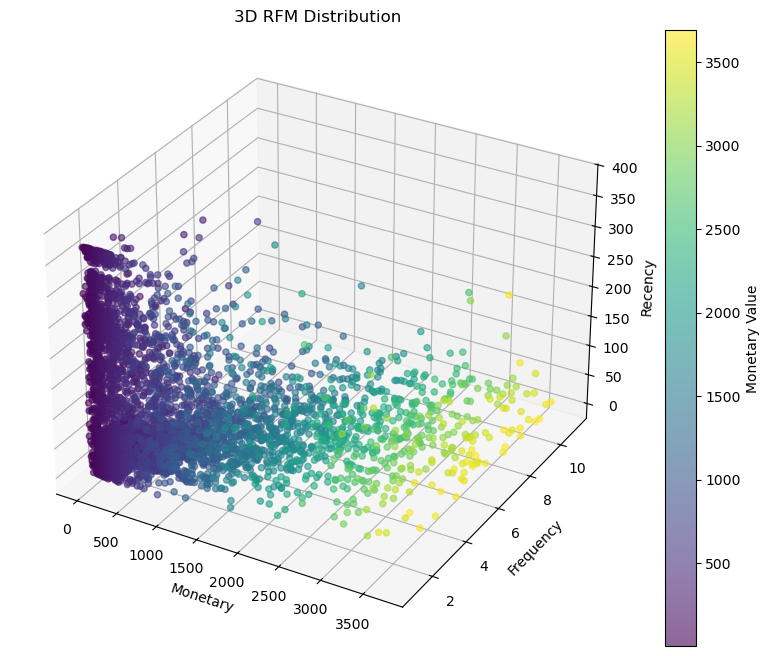

In [261]:
def plot_3d_rfm(df):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(df['Monetary'],
                        df['Frequency'],
                        df['Recency'],
                        c=df['Monetary'],
                        cmap='viridis',
                        alpha=0.6)

    ax.set_xlabel('Monetary')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Recency')
    
    plt.colorbar(scatter, label='Monetary Value')
    plt.title('3D RFM Distribution')
    plt.show()

plot_3d_rfm(non_outliers_df)

### Xem xét RFM xem data có skewed không?

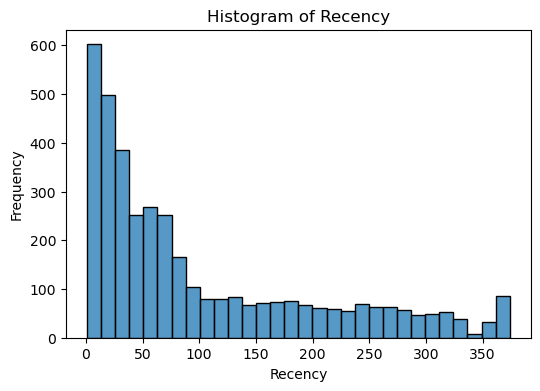

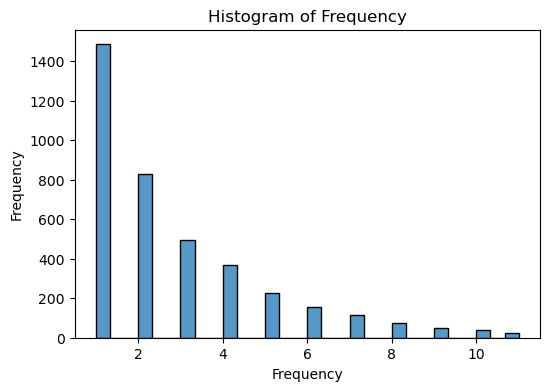

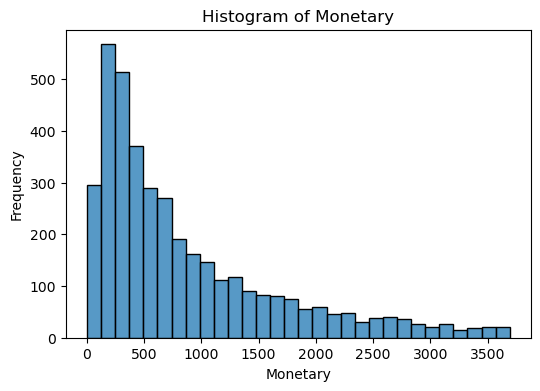

In [262]:
#plot histogram non_outliers_df
for col in non_outliers_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(non_outliers_df[col], bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

=> Right Skewed data can use log

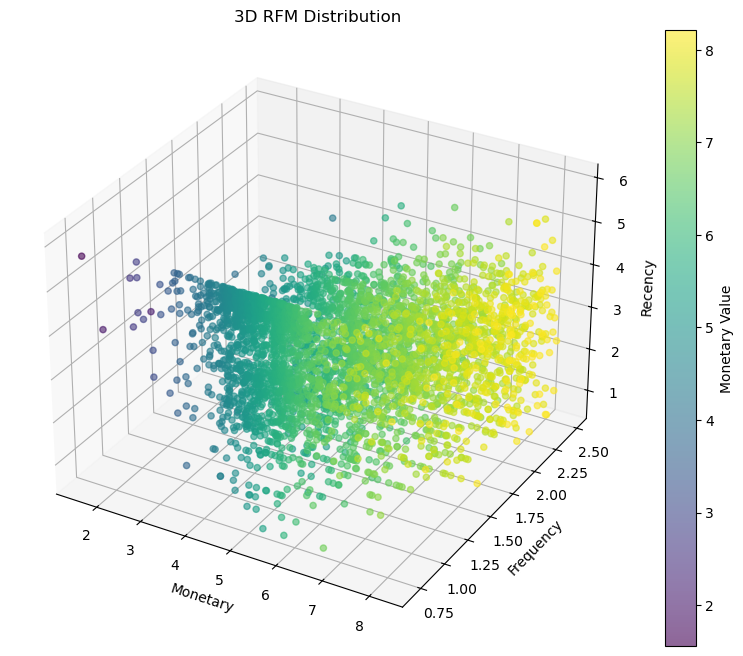

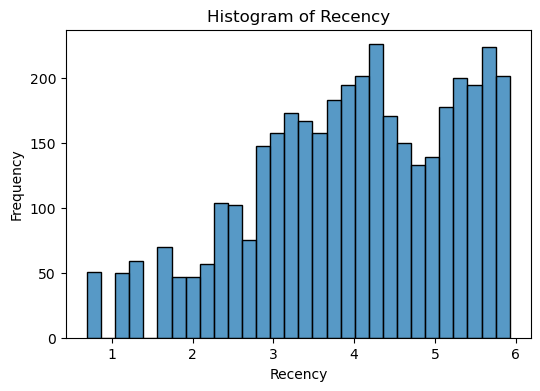

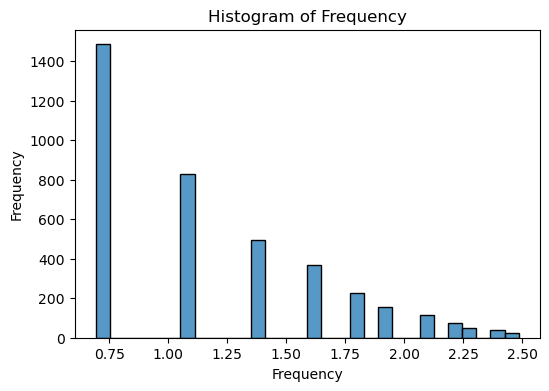

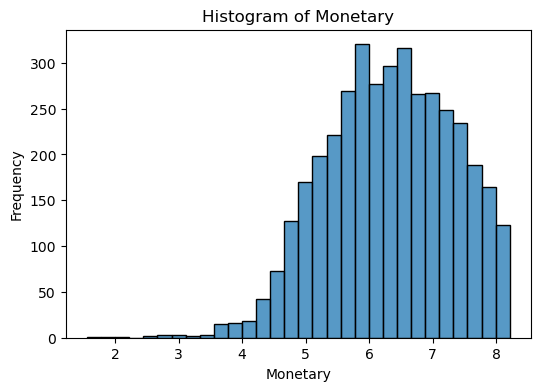

In [263]:
def log_transform(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_log = df.copy()
    df_log[numeric_cols] = np.log1p(df_log[numeric_cols])
    return df_log

non_outliers_df_log = log_transform(non_outliers_df)

plot_3d_rfm(non_outliers_df_log)

for col in non_outliers_df_log.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(non_outliers_df_log[col], bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Build Model (Vân Khánh)

## 1. Normalization

### 1.1 StandardScaler

In [264]:
def standard_scale(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

standard_scale(non_outliers_df_log)

standard_scale(non_outliers_df)

standard_scale(rfm)

CustomerID   Recency  Frequency  Monetary
0      -1.716073  2.334574  -0.425097  8.358668
1      -1.715492 -0.905340   0.354417  0.250966
2      -1.714911 -0.175360  -0.035340 -0.028596
3      -1.714330 -0.735345  -0.425097 -0.033012
4      -1.713749  2.174578  -0.425097 -0.191347
...          ...       ...        ...       ...
4333    1.730701  1.854587  -0.425097 -0.208459
4334    1.731282  0.884612  -0.425097 -0.219560
4335    1.731863 -0.845342  -0.295178 -0.208742
4336    1.732443 -0.885341   1.523687  0.004519
4337    1.734767 -0.495351  -0.165259 -0.024141

[4338 rows x 4 columns]

### 1.2 Min Max Scaler

In [265]:
# def min_max_scale(df):
#     numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
#     scaler = MinMaxScaler()
#     df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
#     return df

# min_max_scale(non_outliers_df_log)

# min_max_scale(non_outliers_df)

# min_max_scale(rfm)
# rfm.drop(columns = 'CustomerID', inplace = True, axis = 1)

## 2. KMeans Model


### 2.1 WCSS

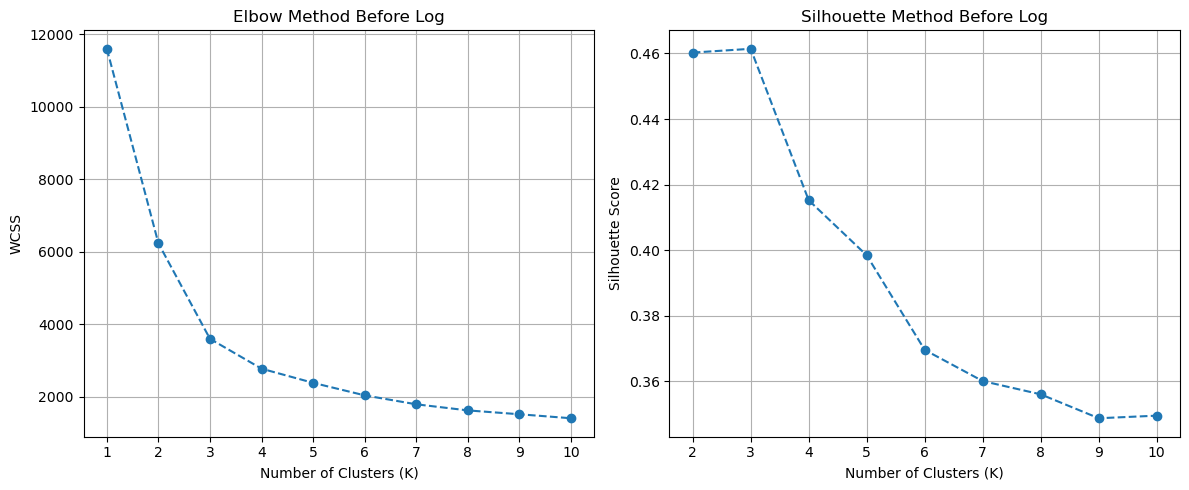

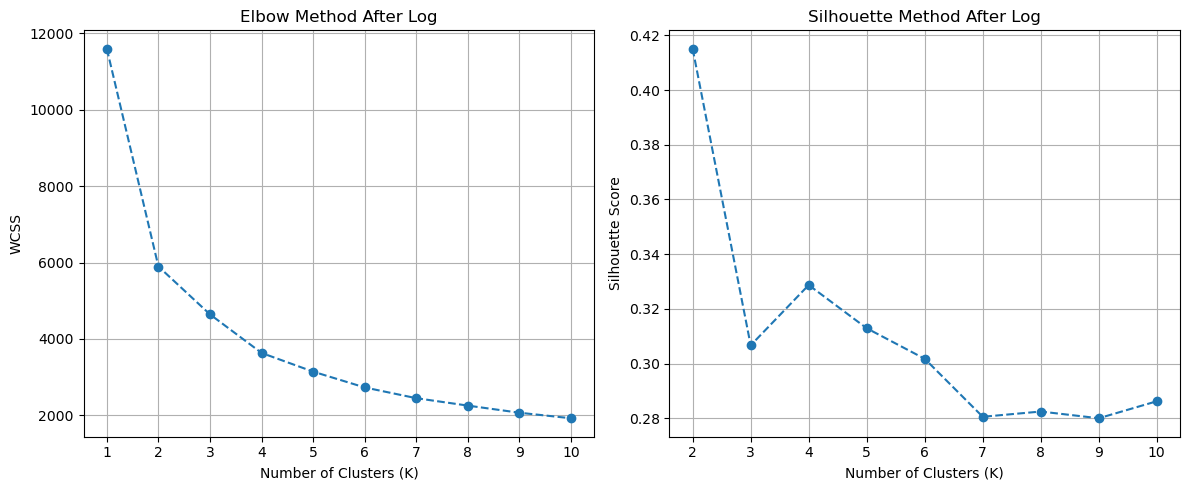

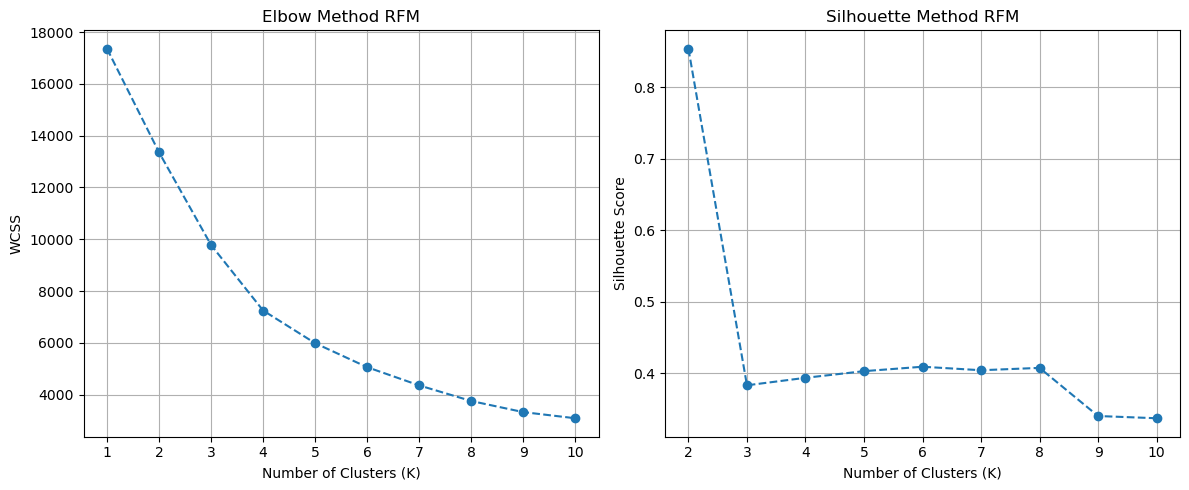

In [266]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Đơn thuần là gán giá trị để đặt tên phân biệt, không gọi hàm
non_outliers_df.name = 'Before Log'
non_outliers_df_log.name = 'After Log'
rfm.name = "RFM"
def find_optimal_k_wcss(data, max_k):
    wcss = []
    for i in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plot WCSS
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
    plt.title(f'Elbow Method {data.name}')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS')
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)

    # Calculate silhouette scores
    silhouette_scores = []
    for i in range(2, max_k + 1):  # Silhouette score needs at least 2 clusters
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))

    # Plot Silhouette scores
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title(f'Silhouette Method {data.name}')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(2, max_k + 1))
    plt.grid(True)
    plt.tight_layout()

# Example usage (replace non_outliers_df_log with your data)
# You might want to experiment with different max_k values
find_optimal_k_wcss(non_outliers_df, 10)

find_optimal_k_wcss(non_outliers_df_log, 10)

find_optimal_k_wcss(rfm, 10)

# Silhouette accuracy after Log is significantly lower than before log -> Choose Before log
# choosing k=3

### 2.2 FUNCTION TO USE KMEANS

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

# def perform_kmeans_clustering(data, n_clusters= 3):

#     # Build K-Means model
#     kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
#     kmeans.fit(data)
#     labels = kmeans.labels_

#     # Evaluate the model
#     silhouette = silhouette_score(data, labels)
#     calinski = calinski_harabasz_score(data, labels)
#     davies = davies_bouldin_score(data, labels)

#     print(f"Silhouette Score: {silhouette}")
#     print(f"Calinski-Harabasz Score: {calinski}")
#     print(f"Davies-Bouldin Score: {davies}")

#     #3d visualize the whole non pca dataset
#     fig = plt.figure(figsize=(10, 8))
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(data.iloc[:, 2], data.iloc[:, 1], data.iloc[:, 0], c=labels, cmap='viridis')
#     ax.set_title('K-Means Clustering Results (3D)')
#     ax.set_xlabel('M')
#     ax.set_ylabel('F')
#     ax.set_zlabel('R')
#     plt.show()

#     # Visualize the clusters using PCA
#     pca = PCA(n_components=2)
#     principal_components = pca.fit_transform(data)
#     pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
#     pca_df['cluster'] = labels

#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x='principal component 1', y='principal component 2' ,hue='cluster', data=pca_df, palette='viridis', legend='full')
#     plt.title('K-Means Clustering Results (PCA)')
#     plt.show()
    
#     return labels

In [ ]:
def perform_kmeans_clustering(data, n_clusters):
    # Model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(data)
    labels = kmeans.labels_

    #3 basic index
    silhouette = silhouette_score(data, labels)
    calinski = calinski_harabasz_score(data, labels)
    davies = davies_bouldin_score(data, labels)

    # Dunn Index
    distances = euclidean_distances(data)
    
    ## Max intra-cluster distance (diameter)
    max_intra = 0
    for cluster in np.unique(labels):
        cluster_idx = np.where(labels == cluster)[0]
        if len(cluster_idx) > 1:
            intra_dist = distances[np.ix_(cluster_idx, cluster_idx)].max()
            max_intra = max(max_intra, intra_dist)

    ## Min inter-cluster distance
    min_inter = np.inf
    unique_labels = np.unique(labels)
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i_idx = np.where(labels == unique_labels[i])[0]
            cluster_j_idx = np.where(labels == unique_labels[j])[0]
            inter_dist = distances[np.ix_(cluster_i_idx, cluster_j_idx)].min()
            min_inter = min(min_inter, inter_dist)

    dunn_index = min_inter / max_intra if max_intra > 0 else 0

    #Print
    print(f"Silhouette Score: {silhouette}")
    print(f"Calinski-Harabasz Score: {calinski}")
    print(f"Davies-Bouldin Score: {davies}")
    print(f"Dunn Index: {dunn_index}")

    #Plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data.iloc[:, 2], data.iloc[:, 1], data.iloc[:, 0], c=labels)
    ax.set_title('K-Means Clustering Results (3D)')
    ax.set_xlabel('Monetary')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('R')
    plt.show()

    #PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    pca_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
    pca_df['cluster'] = labels
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='principal component 1', y='principal component 2', hue='cluster', data=pca_df, palette='viridis', legend='full')
    plt.title('K-Means Clustering Results (PCA)')
    plt.show()
    
    return labels

Khi sử dụng DUNN INDEX vào mô hình Kmeans khiến cho max intra bị phình to ra -> Dunn Index nhỏ 
Chỉ kỳ vọng dunn index trong khoảng 0.001 đến 0.2

### 2.2.1 Model KMEANS (With Outliers Data)

Silhouette Score: 0.39370733814111564
Calinski-Harabasz Score: 2014.1856295177483
Davies-Bouldin Score: 0.8597680060471208
Dunn Index: 0.0010132696113309902


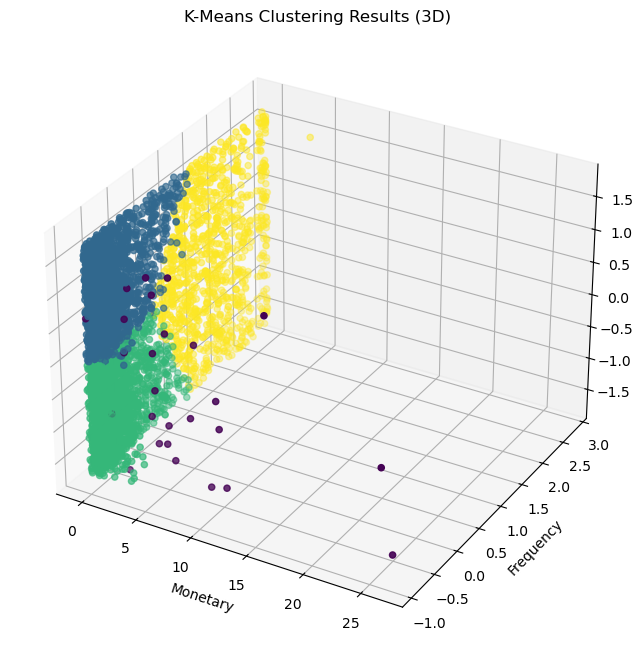

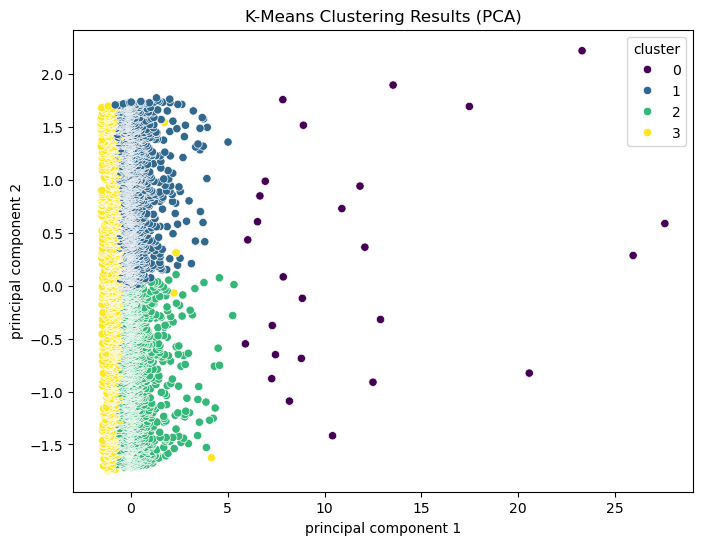

array([3, 2, 2, ..., 1, 1, 1], dtype=int32)

In [310]:
perform_kmeans_clustering(rfm, n_clusters=4)

Bị ảnh hưởng nhiều bởi outliers dữ liệu chồng chéo lên nhau

### 2.2.2 Model Kmeans (With Non-Outliers Data)

Silhouette Score: 0.41521793186482303
Calinski-Harabasz Score: 4090.8203475113824
Davies-Bouldin Score: 0.8901213817607687
Dunn Index: 0.0062009455746722345


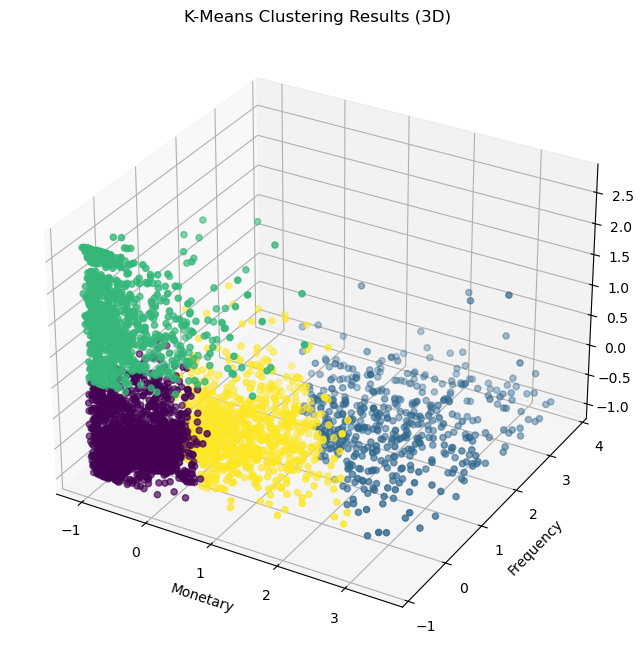

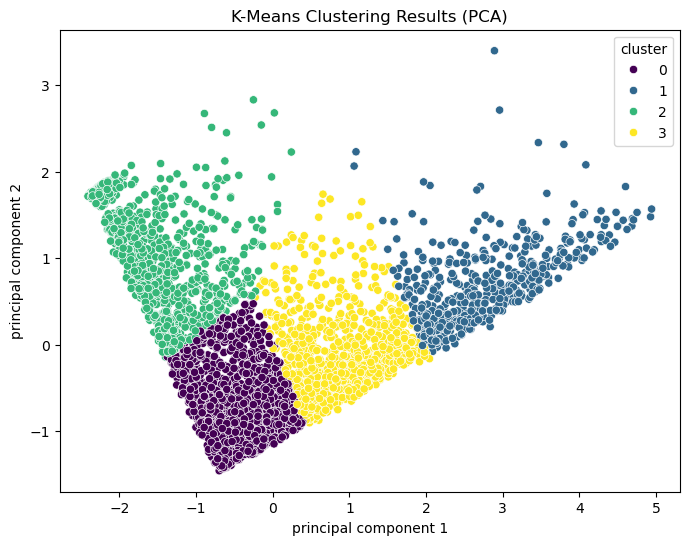

In [321]:
labels = perform_kmeans_clustering(non_outliers_df, n_clusters=4)

Phân cụm rõ ràng ở khoảng n_cluster = 3 or 4

### 2.2.3 Model Kmeans (With Log Data)

Silhouette Score: 0.3287144393420125
Calinski-Harabasz Score: 2816.928905401757
Davies-Bouldin Score: 1.0183932767221475
Dunn Index: 0.0032545142376569362


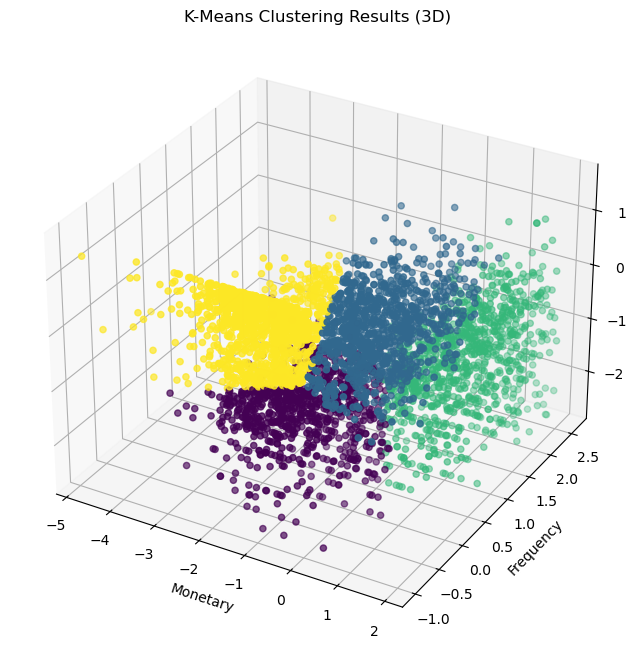

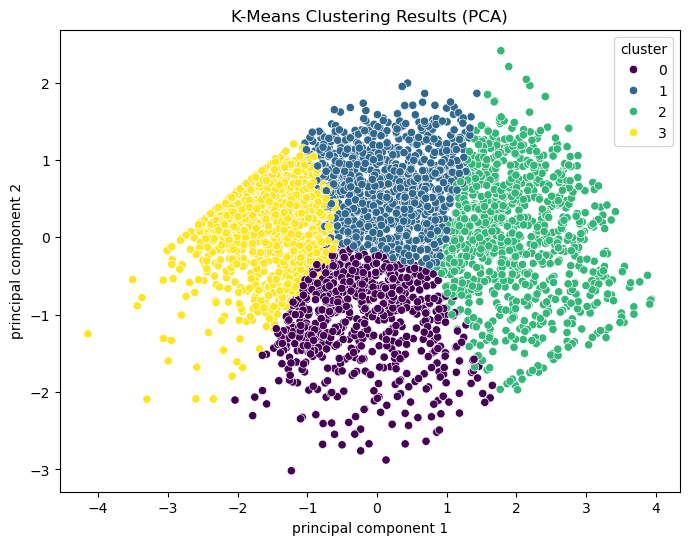

In [320]:
labels_2 = perform_kmeans_clustering(non_outliers_df_log, 4)

## 3. Model DBSCAN (With Outliers Data only)

### 3.1 Sử dụng KNN để biết param phù hợp nhất

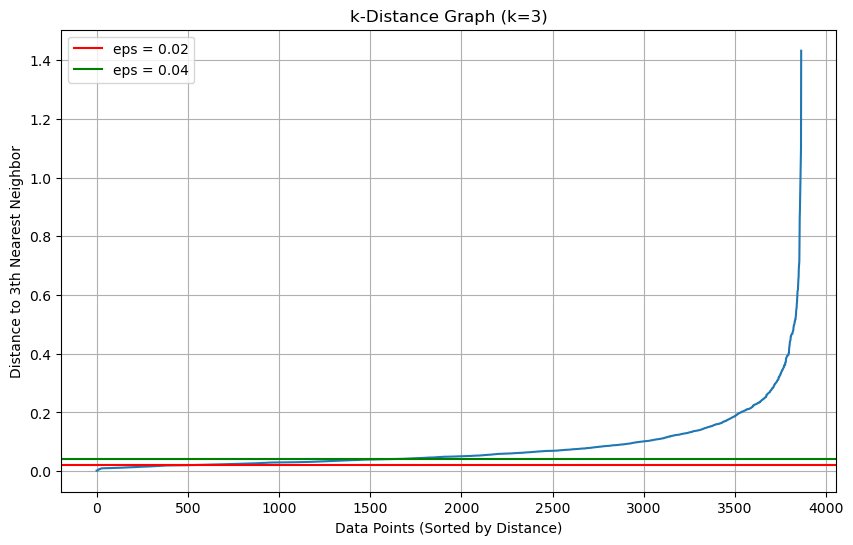

In [129]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def plot_k_distance(data, k):
    """
    Plots the k-distance graph to help determine the optimal eps for DBSCAN.

    Args:
        data: The input DataFrame or array for clustering.
        k: The number of neighbors to consider.
    """
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)

    # Sort distances
    distances = np.sort(distances[:, k-1], axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.title(f'k-Distance Graph (k={k})')
    plt.xlabel('Data Points (Sorted by Distance)')
    plt.ylabel(f'Distance to {k}th Nearest Neighbor')
    plt.grid(True)

    # Add vertical lines at y=0.02 and y=0.1
    plt.axhline(y=0.02, color='r', linestyle='-', label='eps = 0.02')
    plt.axhline(y=0.04, color='g', linestyle='-', label='eps = 0.04')
    plt.legend()

    plt.show()

# Example usage (replace non_outliers_df_log with your data and choose a suitable k)
# A common starting point for k is 2 * number of dimensions, or simply a small value like 5
plot_k_distance(non_outliers_df, k=3)

### 3.2 Model DBSCAN

Number of clusters: 21
Number of noise points: 3501
Silhouette Score (excluding noise): 0.48472140922731305
Calinski-Harabasz Score (excluding noise): 6755.0143389542445
Davies-Bouldin Score (excluding noise): 0.5032200639002994


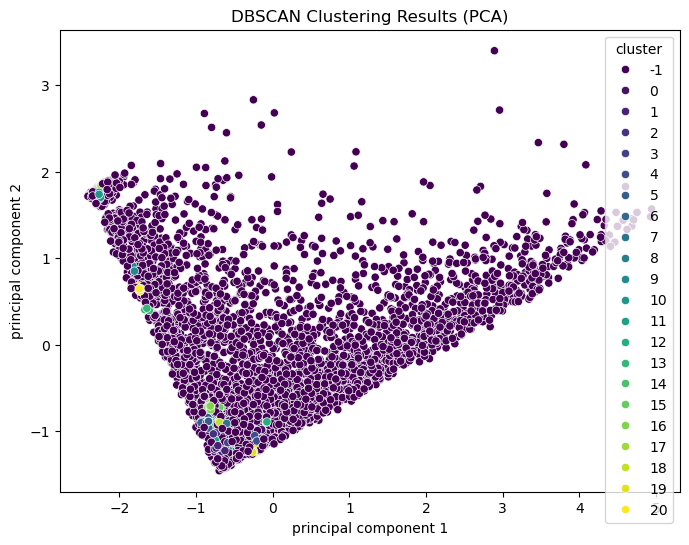

In [128]:
from sklearn.cluster import DBSCAN

def perform_dbscan_clustering(data, eps, min_samples):
    """
    Performs DBSCAN clustering, evaluates the model, and visualizes the results.

    Args:
        data: The input DataFrame or array for clustering.
        eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
        min_samples: The number of samples in a neighborhood for a point to be considered as a core point.

    Returns:
        None (prints evaluation scores and plots the visualization).
    """
    # Build DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)

    # Evaluate the model
    # Note: Silhouette, Calinski-Harabasz, and Davies-Bouldin scores are not suitable for models with noise points (label -1)
    # We can calculate these scores on the data excluding the noise points.
    # However, for a more comprehensive evaluation, consider metrics like V-measure or Adjusted Rand Index if ground truth labels are available.

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f"Number of clusters: {n_clusters}")
    print(f"Number of noise points: {n_noise}")

    if n_clusters > 1:
        # Exclude noise points for evaluation metrics that require at least two clusters
        core_samples_mask = np.zeros_like(labels, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True
        non_noise_indices = labels != -1

        if np.sum(non_noise_indices) > 1:
            silhouette = silhouette_score(data[non_noise_indices], labels[non_noise_indices])
            calinski = calinski_harabasz_score(data[non_noise_indices], labels[non_noise_indices])
            davies = davies_bouldin_score(data[non_noise_indices], labels[non_noise_indices])

            print(f"Silhouette Score (excluding noise): {silhouette}")
            print(f"Calinski-Harabasz Score (excluding noise): {calinski}")
            print(f"Davies-Bouldin Score (excluding noise): {davies}")
        else:
            print("Cannot compute evaluation scores: Not enough non-noise points for evaluation.")
    else:
        print("Cannot compute evaluation scores: Only one cluster or all points are noise.")


    # Visualize the clusters using PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
    pca_df['cluster'] = labels

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='principal component 1', y='principal component 2', hue='cluster', data=pca_df, palette='viridis', legend='full')
    plt.title('DBSCAN Clustering Results (PCA)')
    plt.show()

# Example usage (replace non_outliers_df_log with your data)
# You might need to adjust min_samples based on your data
perform_dbscan_clustering(non_outliers_df, eps=0.04, min_samples=10)




## 4. Chọn Model Kmeans 2.2.2 làm phân tích

In [67]:
non_outliers_df

Recency  Frequency  Monetary
2     0.198391        0.3  0.486234
3     0.048257        0.0  0.475474
4     0.828418        0.0  0.089643
5     0.093834        0.7  0.678398
6     0.544236        0.0  0.023112
...        ...        ...       ...
4332  0.195710        0.0  0.046129
4333  0.742627        0.0  0.047946
4334  0.482574        0.0  0.020895
4335  0.018767        0.1  0.047255
4337  0.112601        0.2  0.497090

[3864 rows x 3 columns]

# Outliers Analysis (Khôi)

## 1. Đưa labels của Cluster vào non_outliers_df

In [322]:
non_outliers_data['Cluster'] = labels
non_outliers_data = non_outliers_data.sort_values(by = 'CustomerID')
non_outliers_data

CustomerID  Recency  Frequency  Monetary  Cluster
2        12348.0       75          4   1797.24        3
3        12349.0       19          1   1757.55        3
4        12350.0      310          1    334.40        2
5        12352.0       36          8   2506.04        1
6        12353.0      204          1     89.00        2
...          ...      ...        ...       ...      ...
4332     18278.0       74          1    173.90        0
4333     18280.0      278          1    180.60        2
4334     18281.0      181          1     80.82        2
4335     18282.0        8          2    178.05        0
4337     18287.0       43          3   1837.28        3

[3864 rows x 5 columns]

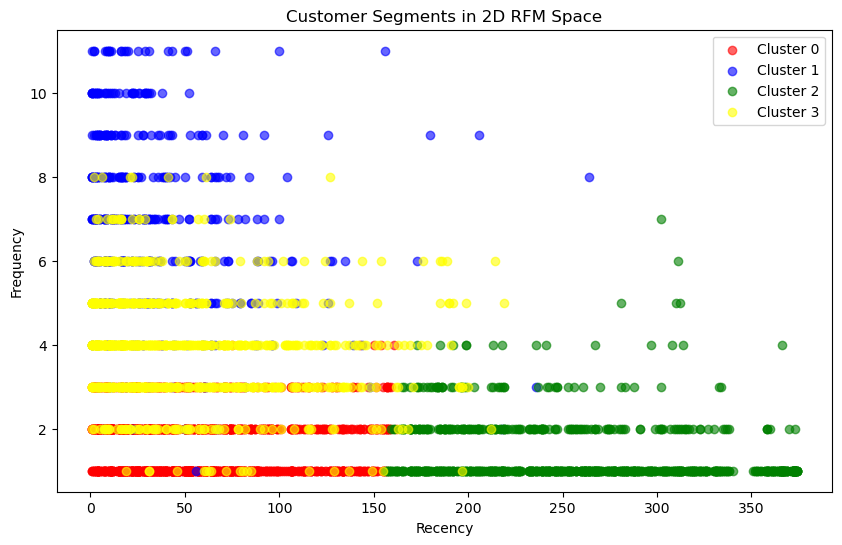

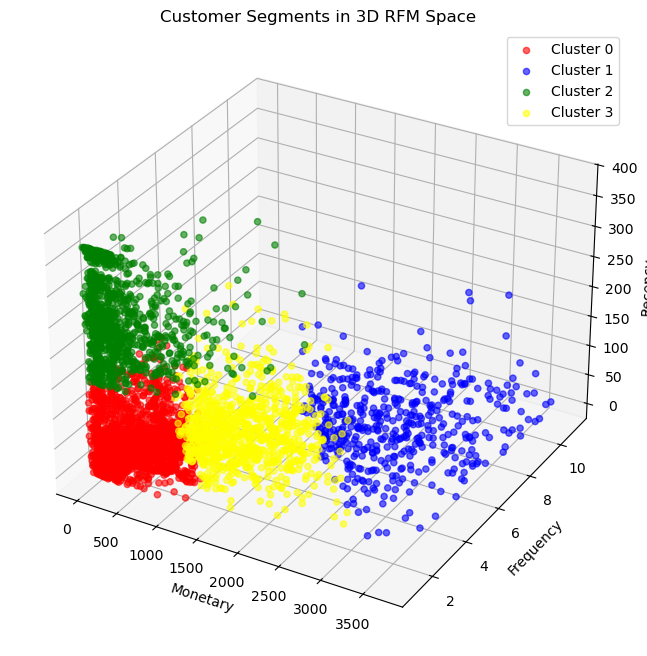

In [323]:
def plot_rfm_clusters_2d(data):
    plt.figure(figsize=(10, 6))
    
    colors = ['red', 'blue', 'green', 'yellow', 'purple']
    
    for cluster in sorted(data['Cluster'].unique()):
        cluster_data = data[data['Cluster'] == cluster]
        plt.scatter(cluster_data['Recency'], 
                    cluster_data['Frequency'],
                    c=colors[cluster],
                    label=f'Cluster {cluster}',
                    alpha=0.6)
    
    plt.xlabel('Recency')
    plt.ylabel('Frequency')
    plt.title('Customer Segments in 2D RFM Space')
    plt.legend()
    plt.show()

plot_rfm_clusters_2d(non_outliers_data)

def plot_rfm_clusters_3d(data):
    # Create 3D scatter plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create color map for clusters
    colors = ['red', 'blue', 'green', 'yellow','purple']
    
    # Plot each cluster
    for cluster in sorted(data['Cluster'].unique()):
        cluster_data = data[data['Cluster'] == cluster]
        ax.scatter(cluster_data['Monetary'], 
                cluster_data['Frequency'], 
                cluster_data['Recency'],
                c=colors[cluster],
                label=f'Cluster {cluster}',
                alpha=0.6)
    
    # Customize the plot
    ax.set_xlabel('Monetary')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Recency')
    ax.set_title('Customer Segments in 3D RFM Space')
    plt.legend()
    plt.show()
    
plot_rfm_clusters_3d(non_outliers_data)

## 2. Tạo bảng dựa trên outliers vừa xóa đi

In [280]:
overlap_index = m_outliers.index.intersection(f_outliers.index)

m_o_outliers = m_outliers.drop(overlap_index)
f_o_outliers = f_outliers.drop(overlap_index)
mf_o_outliers = m_outliers.loc[overlap_index]

In [281]:
m_o_outliers['Cluster'] =  -3
f_o_outliers['Cluster'] = -2
mf_o_outliers['Cluster'] = -1

In [282]:
outliers_data = pd.concat([m_o_outliers, f_o_outliers, mf_o_outliers])
outliers_data

CustomerID  Recency  Frequency  Monetary  Cluster
0        12346.0      326          1  77183.60       -3
1        12347.0        2          7   4310.00       -3
10       12357.0       33          1   6207.67       -3
12       12359.0       58          4   6372.58       -3
15       12362.0        3         10   5226.23       -3
...          ...      ...        ...       ...      ...
4252     18172.0       15         20   7561.68       -1
4272     18198.0        4         17   5425.56       -1
4291     18223.0        5         14   6484.54       -1
4293     18225.0        3         12   5509.12       -1
4297     18229.0       12         20   7276.90       -1

[474 rows x 5 columns]

In [283]:
rfm_non_outliers = pd.concat([non_outliers_data, outliers_data])
rfm_non_outliers

CustomerID  Recency  Frequency  Monetary  Cluster
2        12348.0       75          4   1797.24        3
3        12349.0       19          1   1757.55        3
4        12350.0      310          1    334.40        2
5        12352.0       36          8   2506.04        1
6        12353.0      204          1     89.00        2
...          ...      ...        ...       ...      ...
4252     18172.0       15         20   7561.68       -1
4272     18198.0        4         17   5425.56       -1
4291     18223.0        5         14   6484.54       -1
4293     18225.0        3         12   5509.12       -1
4297     18229.0       12         20   7276.90       -1

[4338 rows x 5 columns]

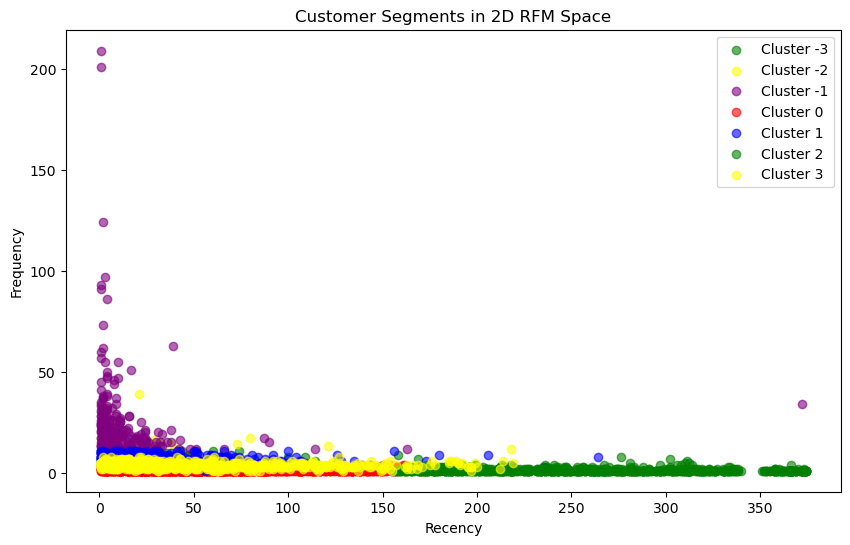

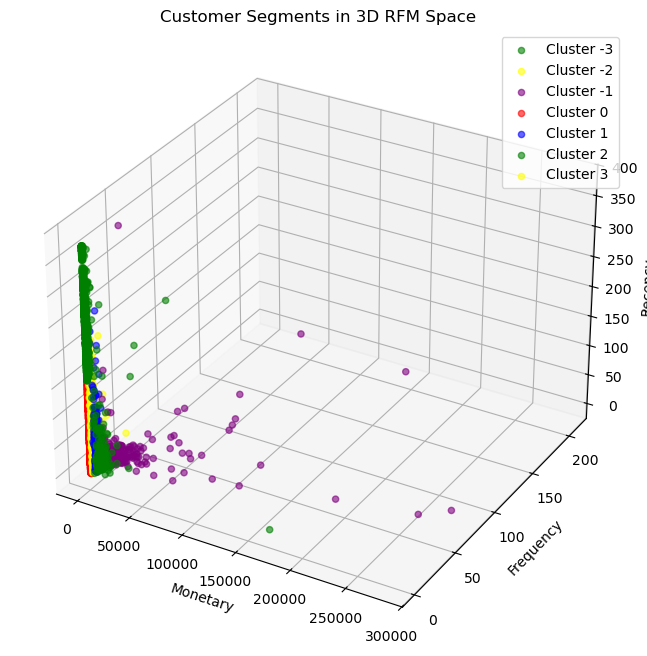

In [324]:

plot_rfm_clusters_2d(rfm_non_outliers)

plot_rfm_clusters_3d(rfm_non_outliers)


## 3. Visualize all Cluster Labels


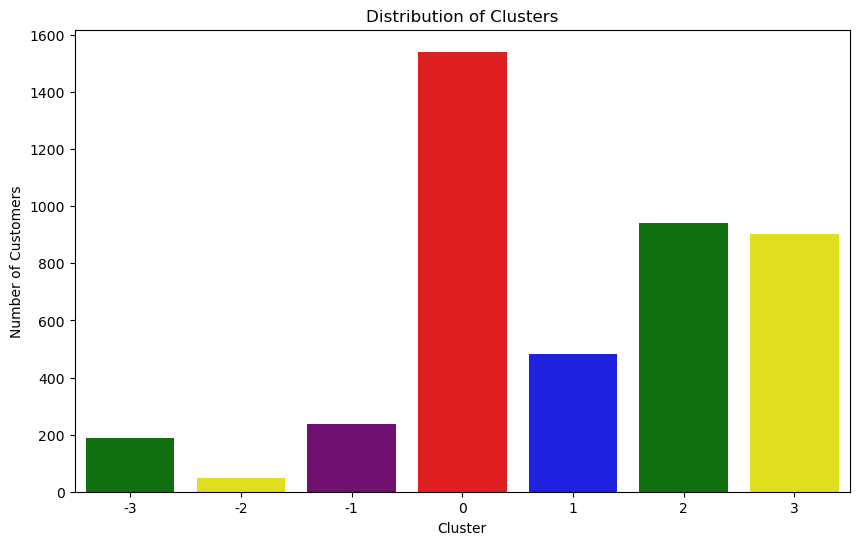

In [329]:
cluster_sizes = rfm_non_outliers['Cluster'].value_counts()
color1 = ['green', 'yellow', 'purple','red', 'blue', ]

plt.figure(figsize = (10,6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette = color1)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

# Add value labels on top of each bar
# for i, v in enumerate(cluster_sizes.values):
#     plt.text(i, v, str(v), ha='center', va='bottom')
# plt.show()

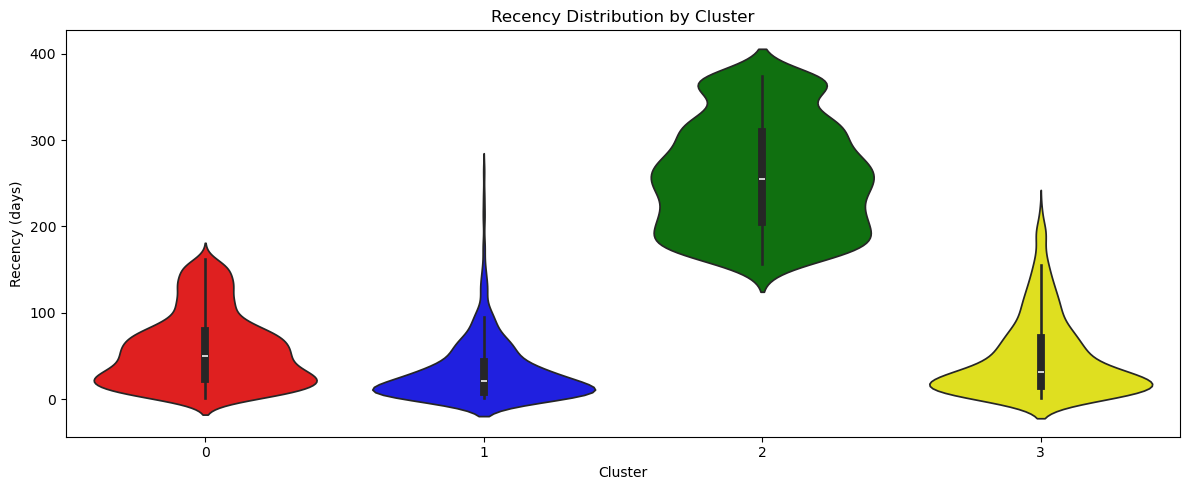

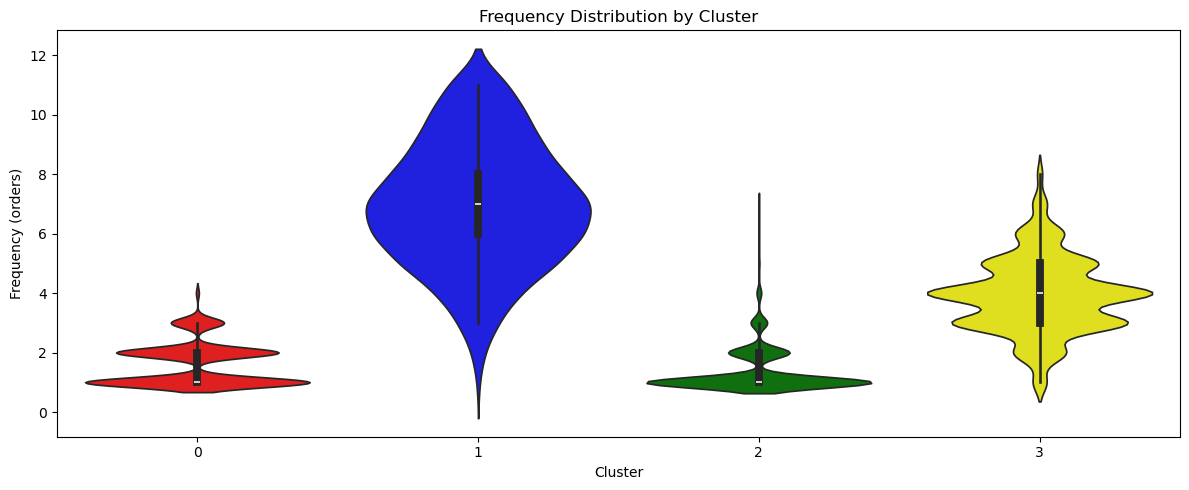

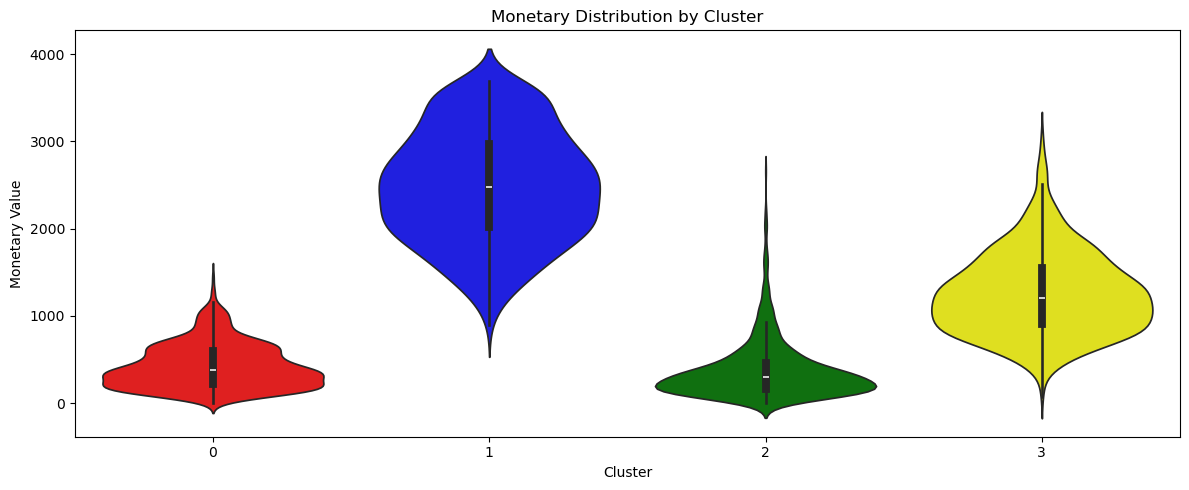

In [326]:
def plot_non_out_violin(data):
    # fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

    # Plot Recency
    plt.figure(figsize = (12,5))
    sns.violinplot(x='Cluster', y='Recency', data=data, palette = ['red', 'blue', 'green', 'yellow','purple' ])
    plt.title('Recency Distribution by Cluster')
    plt.ylabel('Recency (days)')
    plt.tight_layout()
    plt.show()

    # Plot Frequency
    plt.figure(figsize = (12,5))
    sns.violinplot(x='Cluster', y='Frequency', data=data, palette = ['red', 'blue', 'green', 'yellow','purple' ])
    plt.title('Frequency Distribution by Cluster')
    plt.ylabel('Frequency (orders)')
    plt.tight_layout()
    plt.show()

    # Plot Monetary
    plt.figure(figsize = (12,5))
    sns.violinplot(x='Cluster', y='Monetary', data=data, palette = ['red', 'blue', 'green', 'yellow','purple' ])
    plt.title('Monetary Distribution by Cluster')
    plt.ylabel('Monetary Value')

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_non_out_violin(non_outliers_data)


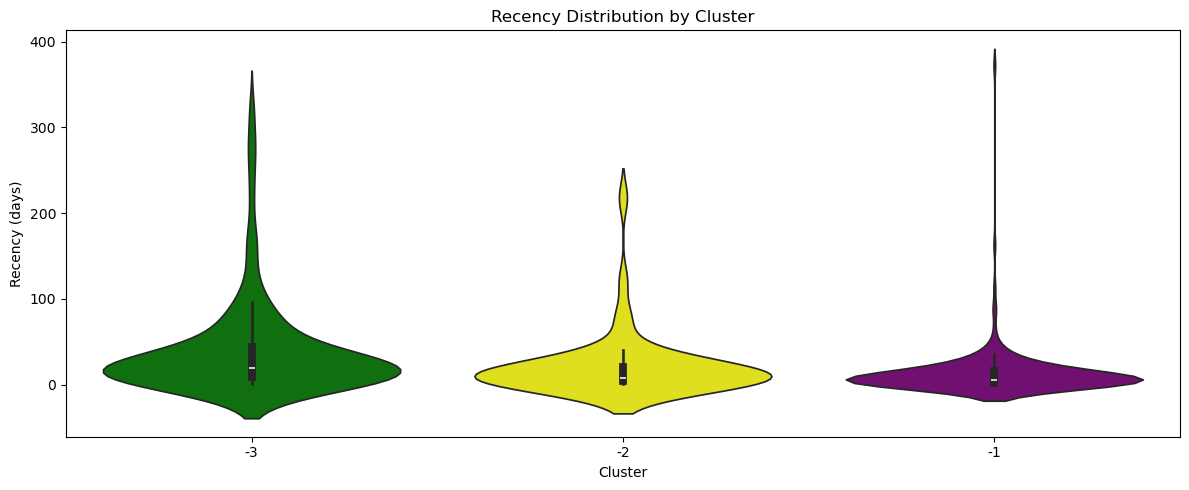

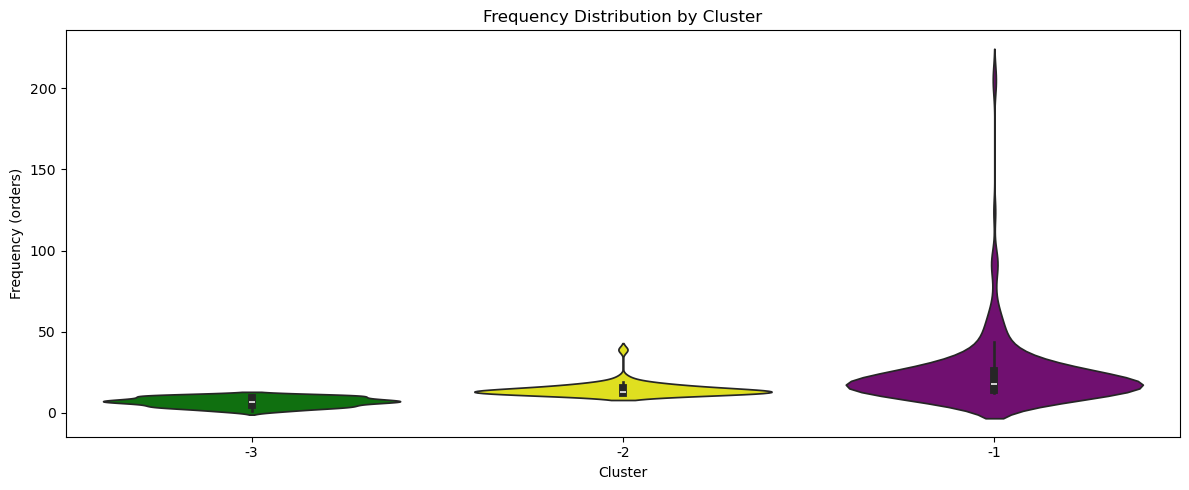

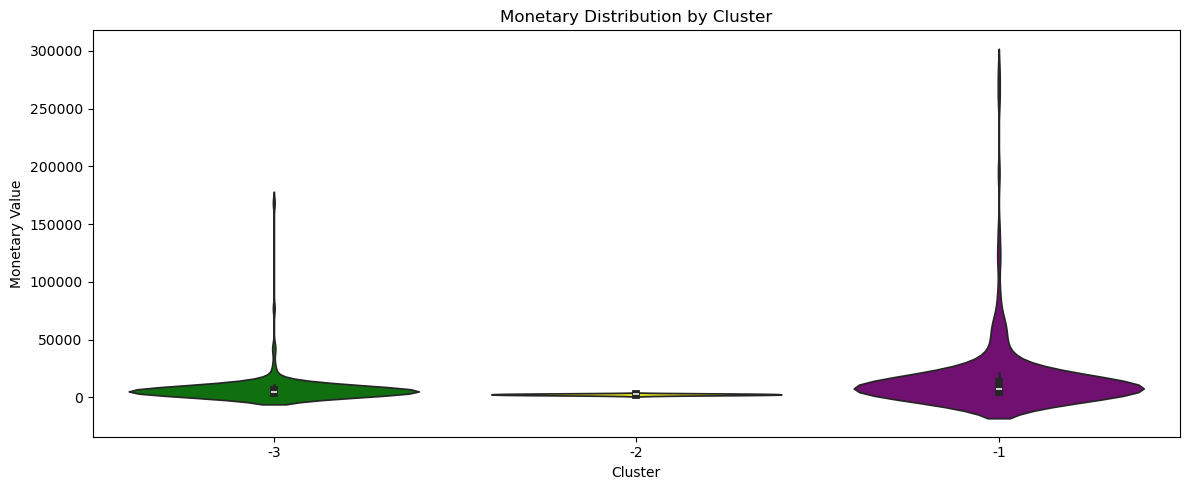

In [330]:
def plot_non_out_violin(data):
    # fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

    # Plot Recency
    plt.figure(figsize = (12,5))
    sns.violinplot(x='Cluster', y='Recency', data=data, palette = ['green', 'yellow', 'purple'])
    plt.title('Recency Distribution by Cluster')
    plt.ylabel('Recency (days)')
    plt.tight_layout()
    plt.show()

    # Plot Frequency
    plt.figure(figsize = (12,5))
    sns.violinplot(x='Cluster', y='Frequency', data=data, palette = ['green', 'yellow', 'purple' ])
    plt.title('Frequency Distribution by Cluster')
    plt.ylabel('Frequency (orders)')
    plt.tight_layout()
    plt.show()

    # Plot Monetary
    plt.figure(figsize = (12,5))
    sns.violinplot(x='Cluster', y='Monetary', data=data, palette = ['green', 'yellow', 'purple' ])
    plt.title('Monetary Distribution by Cluster')
    plt.ylabel('Monetary Value')

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_non_out_violin(outliers_data)


# Phân nhóm các khách hàng này
# (Linh Chi) + (Khánh)

In [141]:
# Calculate mean and median for each cluster
cluster_summary_mean = rfm_non_outliers.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
cluster_summary_median = rfm_non_outliers.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].median()

print("Mean values for each cluster:")
display(cluster_summary_mean)

print("\nMedian values for each cluster:")
display(cluster_summary_median)

Mean values for each cluster:


Recency  Frequency      Monetary
Cluster                                     
-3        40.269841   6.857143   7535.036984
-2        21.510638  14.595745   2646.785957
-1        13.273109  24.605042  16888.991681
 0        24.263852   1.631926    404.074578
 1       111.861723   2.679359   1021.923520
 2        23.838298   5.781915   1830.223096
 3       203.085616   1.154110    254.048836


Median values for each cluster:


Recency  Frequency  Monetary
Cluster                              
-3          20.0        7.0  4939.990
-2           8.0       13.0  2622.570
-1           5.5       18.0  7318.000
 0          22.0        2.0   356.380
 1          87.0        3.0   857.975
 2          17.0        5.0  1718.830
 3         205.5        1.0   227.455

# Task
Tính các chỉ số trung bình (mean và median) của Recency, Frequency, và Monetary cho từng cụm khách hàng dựa trên phân tích RFM.

## Analyze cluster characteristics

### Subtask:
Interpret the mean and median RFM values for each cluster to understand the distinct customer segments.


In [78]:
# Analyze cluster characteristics based on mean and median RFM values

print("Cluster Characteristics based on Mean RFM Values:")
print(cluster_summary_mean)
print("\nCluster Characteristics based on Median RFM Values:")
print(cluster_summary_median)

# Interpretation of clusters based on mean and median values
print("\nInterpretation of Clusters:")

# Cluster -3 (Monetary Outliers)
print("\nCluster -3 (Monetary Outliers):")
print(f"Mean Recency: {cluster_summary_mean.loc[-3, 'Recency']:.2f}, Median Recency: {cluster_summary_median.loc[-3, 'Recency']:.2f}")
print(f"Mean Frequency: {cluster_summary_mean.loc[-3, 'Frequency']:.2f}, Median Frequency: {cluster_summary_median.loc[-3, 'Frequency']:.2f}")
print(f"Mean Monetary: {cluster_summary_mean.loc[-3, 'Monetary']:.2f}, Median Monetary: {cluster_summary_median.loc[-3, 'Monetary']:.2f}")
print("Interpretation: These customers have relatively low Recency and moderate Frequency, but very high Monetary values. The large difference between mean and median Monetary suggests some extreme spenders in this group. These are likely high-value customers with significant individual purchases.")

# Cluster -2 (Frequency Outliers)
print("\nCluster -2 (Frequency Outliers):")
print(f"Mean Recency: {cluster_summary_mean.loc[-2, 'Recency']:.2f}, Median Recency: {cluster_summary_median.loc[-2, 'Recency']:.2f}")
print(f"Mean Frequency: {cluster_summary_mean.loc[-2, 'Frequency']:.2f}, Median Frequency: {cluster_summary_median.loc[-2, 'Frequency']:.2f}")
print(f"Mean Monetary: {cluster_summary_mean.loc[-2, 'Monetary']:.2f}, Median Monetary: {cluster_summary_median.loc[-2, 'Monetary']:.2f}")
print("Interpretation: These customers have low Recency and high Frequency, but moderate Monetary values. The mean Frequency is higher than the median, indicating some customers with exceptionally high purchase frequency. These are likely engaged customers who make frequent, but not necessarily large, purchases.")

# Cluster -1 (Both Monetary and Frequency Outliers)
print("\nCluster -1 (Both Monetary and Frequency Outliers):")
print(f"Mean Recency: {cluster_summary_mean.loc[-1, 'Recency']:.2f}, Median Recency: {cluster_summary_median.loc[-1, 'Recency']:.2f}")
print(f"Mean Frequency: {cluster_summary_mean.loc[-1, 'Frequency']:.2f}, Median Frequency: {cluster_summary_median.loc[-1, 'Frequency']:.2f}")
print(f"Mean Monetary: {cluster_summary_mean.loc[-1, 'Monetary']:.2f}, Median Monetary: {cluster_summary_median.loc[-1, 'Monetary']:.2f}")
print("Interpretation: This cluster represents the most valuable customers with low Recency, very high Frequency, and very high Monetary values. Both mean and median values are high, indicating consistently high engagement and spending. These are likely the 'Champions' or 'Loyalists'. The large difference between mean and median Monetary might indicate the presence of some ultra-high-value customers.")

# Cluster 0
print("\nCluster 0:")
print(f"Mean Recency: {cluster_summary_mean.loc[0, 'Recency']:.2f}, Median Recency: {cluster_summary_median.loc[0, 'Recency']:.2f}")
print(f"Mean Frequency: {cluster_summary_mean.loc[0, 'Frequency']:.2f}, Median Frequency: {cluster_summary_median.loc[0, 'Frequency']:.2f}")
print(f"Mean Monetary: {cluster_summary_mean.loc[0, 'Monetary']:.2f}, Median Monetary: {cluster_summary_median.loc[0, 'Monetary']:.2f}")
print("Interpretation: This cluster has high Recency, low Frequency, and low Monetary values. These are likely lapsed or new customers who have made a single, small purchase a long time ago. They might be considered 'At Risk' or 'Hibernating'.")

# Cluster 1
print("\nCluster 1:")
print(f"Mean Recency: {cluster_summary_mean.loc[1, 'Recency']:.2f}, Median Recency: {cluster_summary_median.loc[1, 'Recency']:.2f}")
print(f"Mean Frequency: {cluster_summary_mean.loc[1, 'Frequency']:.2f}, Median Frequency: {cluster_summary_median.loc[1, 'Frequency']:.2f}")
print(f"Mean Monetary: {cluster_summary_mean.loc[1, 'Monetary']:.2f}, Median Monetary: {cluster_summary_median.loc[1, 'Monetary']:.2f}")
print("Interpretation: This cluster has relatively low Recency, moderate Frequency, and moderate Monetary values. These are likely active customers who purchase somewhat regularly and spend a decent amount. They could be 'Potential Loyalists' or 'Promising'.")

# Cluster 2
print("\nCluster 2:")
print(f"Mean Recency: {cluster_summary_mean.loc[2, 'Recency']:.2f}, Median Recency: {cluster_summary_median.loc[2, 'Recency']:.2f}")
print(f"Mean Frequency: {cluster_summary_mean.loc[2, 'Frequency']:.2f}, Median Frequency: {cluster_summary_median.loc[2, 'Monetary']:.2f}")
print(f"Mean Monetary: {cluster_summary_mean.loc[2, 'Monetary']:.2f}, Median Monetary: {cluster_summary_median.loc[2, 'Monetary']:.2f}")
print("Interpretation: This cluster has moderate Recency, low Frequency, and moderate Monetary values. These customers have made a few purchases some time ago and spent a moderate amount. They might be 'Need Attention' or 'About to Sleep'.")

Cluster Characteristics based on Mean RFM Values:
            Recency  Frequency      Monetary
Cluster                                     
-3        40.269841   6.857143   7535.036984
-2        21.510638  14.595745   2646.785957
-1        13.273109  24.605042  16888.991681
 0       254.786802   1.421320    394.315614
 1        36.138756   6.019139   2092.833327
 2        53.091043   2.086148    589.964470

Cluster Characteristics based on Median RFM Values:
         Recency  Frequency  Monetary
Cluster                              
-3          20.0        7.0   4939.99
-2           8.0       13.0   2622.57
-1           5.5       18.0   7318.00
 0         250.0        1.0    302.70
 1          23.0        6.0   2001.42
 2          45.0        2.0    507.29

Interpretation of Clusters:

Cluster -3 (Monetary Outliers):
Mean Recency: 40.27, Median Recency: 20.00
Mean Frequency: 6.86, Median Frequency: 7.00
Mean Monetary: 7535.04, Median Monetary: 4939.99
Interpretation: These customers ha

In [80]:
# Assign meaningful names to clusters based on interpretation
cluster_names = {
    -3: 'High-Value (Monetary Outliers)',
    -2: 'Frequent (Frequency Outliers)',
    -1: 'Champions (Monetary & Frequency Outliers)',
    0: 'At Risk/Hibernating',
    1: 'Potential Loyalists/Promising',
    2: 'Need Attention/About to Sleep'
}

# Create a new 'Segment' column in the rfm_non_outliers DataFrame
rfm_non_outliers['Segment'] = rfm_non_outliers['Cluster'].map(cluster_names)

# Display the DataFrame with the new 'Segment' column
display(rfm_non_outliers.head())

CustomerID  Recency  Frequency  Monetary  Cluster              Segment
354      12790.0      192          1    324.92        0  At Risk/Hibernating
2995     16427.0      263          2    241.06        0  At Risk/Hibernating
2998     16431.0      213          3    642.81        0  At Risk/Hibernating
1234     14022.0      225          1    440.00        0  At Risk/Hibernating
1226     14012.0      278          1    328.80        0  At Risk/Hibernating

In [81]:
# Calculate mean RFM values for each segment
segment_rfm_mean = rfm_non_outliers.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Merge segment counts with mean RFM values
segment_data = pd.merge(segment_counts, segment_rfm_mean, on='Segment')

# Create the treemap with additional information
fig = px.treemap(segment_data,
                 path=['Segment'],
                 values='Count',
                 color='Monetary',  # Color the segments by average Monetary value
                 hover_data=['Recency', 'Frequency', 'Monetary'],  # Show RFM values on hover
                 title='Distribution of Customers Across Segments with Average RFM Values')
fig.show()

NameError: name 'segment_counts' is not defined